### Data Analysis 

Table of Contents :

METTRE LE SOMMAIRE ICI 

## Objective 

My objective is to :  Analyze Team Productivity

The goal of this project is to analyze the efficiency of teams within a company using data from Jira and Tempo.

The project was approached from three different perspectives:

Project Perspective: An initial analysis was conducted from the perspective of the project.
Sprint Perspective: The second analysis focused on the sprint perspective.
User Perspective: The third analysis was performed from the users' perspective.

In this code, we will begin by analyzing the first perspective: the Project Perspective.

In [11]:
#importing needed libraries for the analysis 
import pandas as pd   
import matplotlib.pyplot as plt 
import seaborn as sns 

In [12]:
#Importing the needed database to analyse them 
jira_issues = pd.read_excel('Jira_issue.xlsx')

In [20]:
#reading the main dataframe 
df = jira_issues

In [ ]:
df

## 1. Extracting Important data in JSON format

To perform the analysis, I discovered that the required data is stored in a JSON file. 
Below, I explain how I identified this and the steps I took to extract the necessary data. 
The three main pieces of data I needed to extract are:

Roadmap: This refers to the number of times a project can be reused within the company.

Anomalies: This pertains to the number of anomalies that occurred for each project.

Commercial, Technical, and Real Hours: These are the hours spent on each project categorized by commercial, technical, and actual hours.

In [ ]:
#inspecting the content of the column fields
df['fields'][1]

In [25]:
#inspecting the type of data inside the column fiels (CF) ==> its a JSON 
type(df['fields'][0])

str

In [ ]:
#Creating a new colums customfields (CF), in order to extract customfields from the colum fields 

import json

def extract_customfields(fields):
    if isinstance(fields, str):
        try:
            fields_dict = json.loads(fields) #"The JSON is loaded into a Python dictionary using json.loads()."
        except json.JSONDecodeError:
            return pd.Series()
    elif isinstance(fields, dict):
        fields_dict = fields
    else:
        return pd.Series()
    customfields = {key: value for key, value in fields_dict.items() if key.startswith('customfield_')} #"The corresponding key-value pairs are stored in custom_fields."
    return pd.Series(customfields)

# Apply the function to the 'fields' column for all rows
customfields_df = df['fields'].apply(extract_customfields)
# Merge the extracted custom fields with the original DataFrame
result_df_customfields = pd.concat([df, customfields_df], axis=1)
result_df_customfields

In [27]:
#looking at the content of the dataframe 
result_df_customfields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 82 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 10324 non-null  int64         
 1   key                10324 non-null  object        
 2   fields             10324 non-null  object        
 3   updated            10323 non-null  datetime64[ns]
 4   changelog          10323 non-null  object        
 5   projectId          10323 non-null  float64       
 6   projectKey         10324 non-null  object        
 7   transitions        10324 non-null  object        
 8   renderedFields     10324 non-null  object        
 9   customfield_10000  7109 non-null   object        
 10  customfield_10018  8901 non-null   object        
 11  customfield_10019  8901 non-null   object        
 12  customfield_10033  8901 non-null   object        
 13  customfield_10052  8901 non-null   object        
 14  custom

In [ ]:
#Dropping unnecessary columns from the DataFrame 

result_df_customfields_clean = result_df_customfields.drop(columns = [
 "customfield_10019",          
 "customfield_10033",         
 "customfield_10052",       
 "customfield_10020",         
 "customfield_10024",         
 "customfield_10070",   
 "customfield_10012",    
 "customfield_10013",          
 "customfield_10017",         
 "customfield_10002",      
 "customfield_10063",    
 "customfield_10064",      
 "customfield_10065",          
 "customfield_10066" ,        
 "customfield_10010" ,       
 "customfield_10027" ,    
 "customfield_10045",          
 "customfield_10123",        
 "customfield_10025",      
 "customfield_10021",    
 "customfield_10055",   
 "customfield_10082",     
 "customfield_10074" ,       
 "customfield_10076" ,         
 "customfield_10077" , 
 "customfield_10078",  
 "customfield_10079" ,        
 "customfield_10080",          
 "customfield_10081" ,         
 "customfield_10046" ,     
 "customfield_10084" ,         
 "customfield_10003",       
 "customfield_10109" ,         
 "customfield_10086" ,         
 "customfield_10087" ,        
 "customfield_10089",     
 "customfield_10090" ,     
 "customfield_10091",          
 "customfield_10092",       
 "customfield_10093" ,        
 "customfield_10094" ,        
 "customfield_10095" ,        
 "customfield_10096" ,         
 "customfield_10097" ,      
 "customfield_10098" ,        
 "customfield_10099"  ,       
 "customfield_10100"  ,   
 "customfield_10101" ,        
 "customfield_10085" ,       
 "customfield_10083" ,         
 "customfield_10034" ,        
 "customfield_10035" ,         
 "customfield_10106" ,         
 "customfield_10118" ,       
 "customfield_10120" ,   
 "customfield_10122" ,      
 "customfield_10107" ,     
 "customfield_10130" ,     
 "customfield_10054" ,
 "customfield_10000",
 "customfield_10015"  
], axis = 1) 
result_df_customfields_clean.info()

In [29]:
#Rename the remaining CF columns to identify their corresponding fields.
result_df_customfields_clean.rename(columns=
{"customfield_10018":"Parent_link",
"customfield_10011": "Epic_name",         
"customfield_10102": "Road_map_produit",     
"customfield_10103": "Macro_estimation_epic_heure", 
"customfield_10001": "Team",        
"customfield_10014" :"Epic_link",       
"customfield_10043" :"Domaine_technique",     
"customfield_10053" :"Criticité",       
"customfield_10108" :"Responsabilité_projet",         
"customfield_10104" :"Temps_consigné_tempo_epic",        
"customfield_10075" :"TMA_Environement",       
"customfield_10004": "Impact_sur_utilisateur"}, 
inplace= True)

result_df_customfields_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           10324 non-null  int64         
 1   key                          10324 non-null  object        
 2   fields                       10324 non-null  object        
 3   updated                      10323 non-null  datetime64[ns]
 4   changelog                    10323 non-null  object        
 5   projectId                    10323 non-null  float64       
 6   projectKey                   10324 non-null  object        
 7   transitions                  10324 non-null  object        
 8   renderedFields               10324 non-null  object        
 9   Parent_link                  8901 non-null   object        
 10  Epic_name                    81 non-null     object        
 11  Road_map_produit             262 non-null

In [ ]:
result_df_customfields_clean

In [31]:
#Create a new column 'timeoriginalestimate' by extracting this data from the 'fields' column.
import json
def extract_multiple_values(json_str, key):
    try:
        data = json.loads(json_str)
        values = []
        def search_key(obj):
            if isinstance(obj, dict):
                for k, v in obj.items():
                    if k == key:
                        values.append(v)
                    elif isinstance(v, (dict, list)):
                        search_key(v)
            elif isinstance(obj, list):
                for item in obj:
                    search_key(item)
        search_key(data)
        return values
    except json.JSONDecodeError:
        return None
result_df_customfields_clean['timeoriginalestimate'] = result_df_customfields_clean['fields'].apply(lambda x: extract_multiple_values(x, 'timeoriginalestimate'))#Create a new column 'timeoriginalestimate' by extracting this data from the 'fields' column.
result_df_customfields_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           10324 non-null  int64         
 1   key                          10324 non-null  object        
 2   fields                       10324 non-null  object        
 3   updated                      10323 non-null  datetime64[ns]
 4   changelog                    10323 non-null  object        
 5   projectId                    10323 non-null  float64       
 6   projectKey                   10324 non-null  object        
 7   transitions                  10324 non-null  object        
 8   renderedFields               10324 non-null  object        
 9   Parent_link                  8901 non-null   object        
 10  Epic_name                    81 non-null     object        
 11  Road_map_produit             262 non-null

In [32]:
result_df_customfields_clean["timeoriginalestimate"].value_counts()

timeoriginalestimate
[]           6574
[14400]       412
[10800]       378
[28800]       325
[7200]        245
             ... 
[79200]         1
[171300]        1
[259200]        1
[1004400]       1
[133200]        1
Name: count, Length: 68, dtype: int64

In [ ]:
pd.set_option('display.max_columns', None) #To display all the columns"
result_df_customfields_clean 

## 2. Road Map par projet 

Now, I need to clean the "Road_map_produit" column from the data I have already extracted. 

I am most interested in the "value" field. 

After cleaning the data, I will analyze it and represent the results using either a pie chart or a bar chart. 

I will not go into a detailed analysis because this is a confidential project.



In [34]:
result_df_customfields_clean["Road_map_produit"].value_counts() 
#You need to extract the value of interest from the product roadmap using a function, specifically extracting the 'value' data. 

Road_map_produit
{'id': '10149', 'self': 'https://jira-ComputerShop.atlassian.net/rest/api/3/customFieldOption/10149', 'value': 'Road Map'}               132
{'id': '10150', 'self': 'https://jira-ComputerShop.atlassian.net/rest/api/3/customFieldOption/10150', 'value': 'Hors RM'}                124
{'id': '10178', 'self': 'https://jira-ComputerShop.atlassian.net/rest/api/3/customFieldOption/10178', 'value': 'Road Map non signÃ©'}      6
Name: count, dtype: int64

In [35]:
#You need to extract the value of interest from the product roadmap using a function, specifically extracting the 'value' field

import ast
# Function to check and extract the 'value' field; a function is necessary here to handle NaN values
def extract_value(x):
    if isinstance(x, str):
        try:
            # Convert the string to a dictionary
            x = ast.literal_eval(x)
        except:
            return None  # Return None if the conversion fails
    if isinstance(x, dict) and 'value' in x:
        return x['value']
    return None  # Return None if it is not a dictionary or if there is no 'value' field.

# Apply the function to the column
result_df_customfields_clean['RMP_value'] = result_df_customfields_clean['Road_map_produit'].apply(extract_value)
result_df_customfields_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           10324 non-null  int64         
 1   key                          10324 non-null  object        
 2   fields                       10324 non-null  object        
 3   updated                      10323 non-null  datetime64[ns]
 4   changelog                    10323 non-null  object        
 5   projectId                    10323 non-null  float64       
 6   projectKey                   10324 non-null  object        
 7   transitions                  10324 non-null  object        
 8   renderedFields               10324 non-null  object        
 9   Parent_link                  8901 non-null   object        
 10  Epic_name                    81 non-null     object        
 11  Road_map_produit             262 non-null

In [ ]:
result_df_customfields_clean

In [37]:
#Distribution of RMP by issues
rmp_repartition = result_df_customfields_clean["RMP_value"].value_counts() 

In [38]:
#create a pie chart to show the proportions
rmp_repartition= pd.DataFrame(rmp_repartition).reset_index()
rmp_repartition


,RMP_value,count
0,Road Map,132
1,Hors RM,124
2,Road Map non signÃ©,6


Text(0.5, 1.0, 'Répartition des Road Map value au niveau des taches')

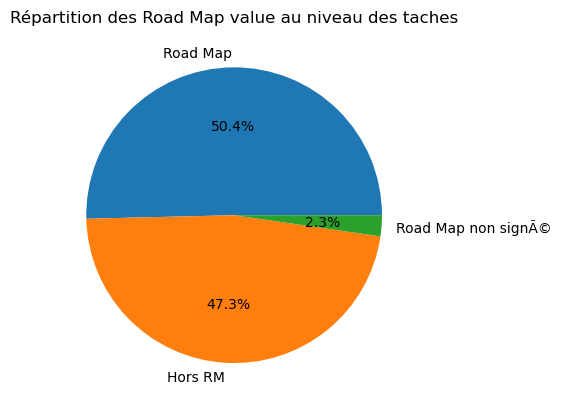

In [39]:
y= rmp_repartition['count']
x = rmp_repartition['RMP_value']
plt.pie(y,labels=x , autopct='%1.1f%%')
plt.title('Répartition des Road Map value au niveau des taches')

In [40]:
result_df_customfields_clean["RMP_value"] 

0        None
1        None
2        None
3        None
4        None
         ... 
10319    None
10320    None
10321    None
10322    None
10323    None
Name: RMP_value, Length: 10324, dtype: object

In [41]:
#calculate the number of roadmaps distributed per project
repartition_rdm_parprojet = result_df_customfields_clean.groupby(['projectId',"RMP_value"])['id'].count()  
repartition_rdm_parprojet
#create a DataFrame to put the series into
repartition_rdm_parprojet= pd.DataFrame(repartition_rdm_parprojet).reset_index()

#to transfer and rename the column 'id' to 'number of RMP issues
repartition_rdm_parprojet.rename(columns={'id': 'nbre_issues_RMP'}, inplace=True)
repartition_rdm_parprojet

,projectId,RMP_value,nbre_issues_RMP
0,10001.0,Hors RM,5
1,10001.0,Road Map,6
2,10007.0,Hors RM,8
3,10007.0,Road Map,4
4,10008.0,Hors RM,8
5,10008.0,Road Map,3
6,10009.0,Hors RM,8
7,10009.0,Road Map,7
8,10012.0,Hors RM,3
9,10013.0,Hors RM,9


In [43]:
repartition_rdm_parprojet['projectId'].nunique()
#il y a 23 projets étudiés ici

23

Text(0.5, 1.0, 'Répartition des Road Map value par projet')

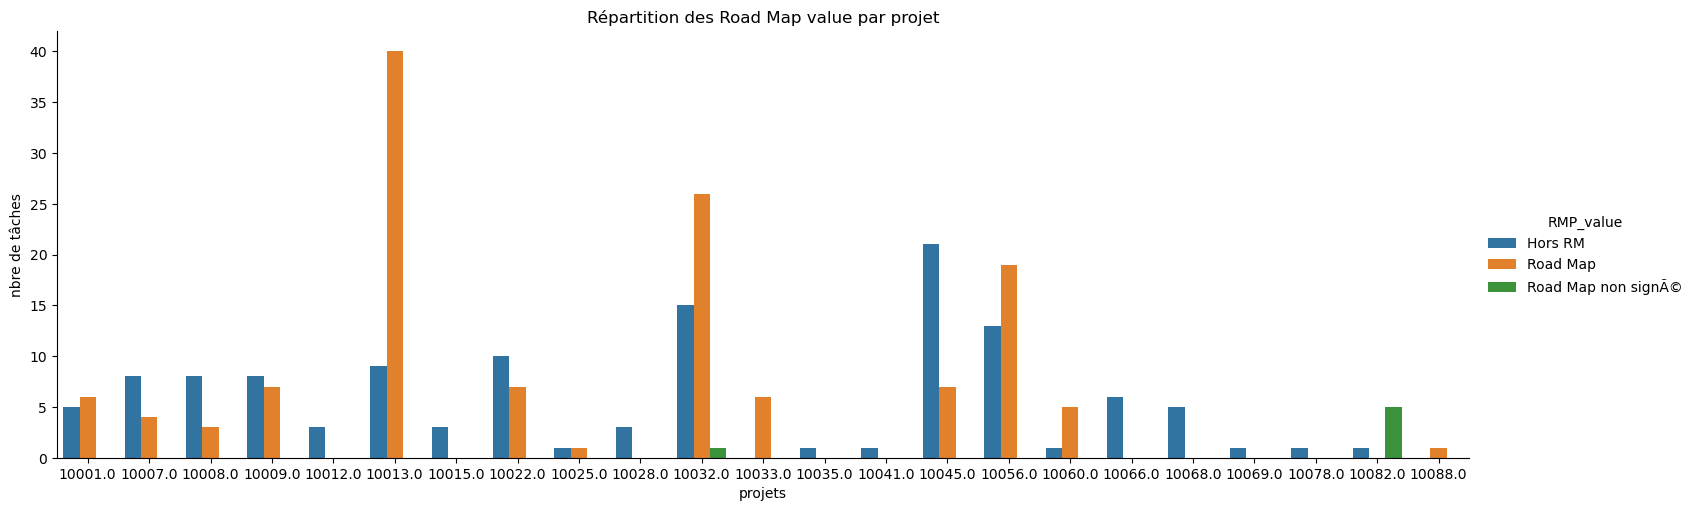

In [44]:
#create a Matplotlib plot to view the distributions by project
#there are 23 projects in total
sns.catplot(data=repartition_rdm_parprojet, x = 'projectId', y= 'nbre_issues_RMP', hue= 'RMP_value', kind='bar', aspect = 3)
plt.xlabel('projets')
plt.ylabel('nbre de tâches')
plt.title('Répartition des Road Map value par projet')

## 3. Anomalies dans un projet 

The objective of this section is to identify which projects contain the most major anomalies and which do not, as well as to analyze how anomalies are distributed across the projects.

In [45]:
#First, we look at the contents of the 'criticality' column
result_df_customfields_clean["Criticité"].value_counts() 
#We need to extract only the value from the 'value' field

Criticité
{'id': '10038', 'self': 'https://jira-ComputerShop.atlassian.net/rest/api/3/customFieldOption/10038', 'value': 'Anomalie mineure'}      7172
{'id': '10037', 'self': 'https://jira-ComputerShop.atlassian.net/rest/api/3/customFieldOption/10037', 'value': 'Anomalie majeure'}       142
{'id': '10036', 'self': 'https://jira-ComputerShop.atlassian.net/rest/api/3/customFieldOption/10036', 'value': 'Anomalie bloquante'}      73
Name: count, dtype: int64

In [46]:
#We need to further extract the value of interest from 'criticality' (using a function) and retrieve the 'value' data

import ast
# Function to check and extract the value from 'value'; we need to create a function here to handle NaN values
def extract_value(x):
    if isinstance(x, str):
        try:
            # Convert the string to a dictionary
            x = ast.literal_eval(x)
        except:
            return None  # Return None if the conversion fails
    if isinstance(x, dict) and 'value' in x:
        return x['value']
    return None  # Return None if it is not a dictionary or if there is no 'value'

# Apply the function to the column
result_df_customfields_clean['Criticité_value'] = result_df_customfields_clean['Criticité'].apply(extract_value)
result_df_customfields_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           10324 non-null  int64         
 1   key                          10324 non-null  object        
 2   fields                       10324 non-null  object        
 3   updated                      10323 non-null  datetime64[ns]
 4   changelog                    10323 non-null  object        
 5   projectId                    10323 non-null  float64       
 6   projectKey                   10324 non-null  object        
 7   transitions                  10324 non-null  object        
 8   renderedFields               10324 non-null  object        
 9   Parent_link                  8901 non-null   object        
 10  Epic_name                    81 non-null     object        
 11  Road_map_produit             262 non-null

In [47]:
#Calculate the number of critical tasks per project
repartition_criticité_parprojet = result_df_customfields_clean.groupby(['projectId',"Criticité_value"])['id'].count()  
repartition_criticité_parprojet= pd.DataFrame(repartition_criticité_parprojet).reset_index()
repartition_criticité_parprojet


,projectId,Criticité_value,id
0,10001.0,Anomalie mineure,53
1,10006.0,Anomalie mineure,8
2,10007.0,Anomalie mineure,152
3,10008.0,Anomalie majeure,1
4,10008.0,Anomalie mineure,377
...,...,...,...
67,10084.0,Anomalie mineure,28
68,10086.0,Anomalie mineure,1
69,10088.0,Anomalie mineure,3
70,10089.0,Anomalie majeure,7


In [48]:
repartition_criticité_parprojet['projectId'].nunique() 
#There are 50 projects studied here

50

In [49]:
repartition_criticité_parprojet= pd.DataFrame(repartition_criticité_parprojet)#.reset_index()

repartition_criticité_parprojet.rename(columns={'id': 'Anomalie_nbre_issue'}, inplace=True)
repartition_criticité_parprojet

,projectId,Criticité_value,Anomalie_nbre_issue
0,10001.0,Anomalie mineure,53
1,10006.0,Anomalie mineure,8
2,10007.0,Anomalie mineure,152
3,10008.0,Anomalie majeure,1
4,10008.0,Anomalie mineure,377
...,...,...,...
67,10084.0,Anomalie mineure,28
68,10086.0,Anomalie mineure,1
69,10088.0,Anomalie mineure,3
70,10089.0,Anomalie majeure,7


In [50]:
#Graph of projects with only major anomalies
Anomalie_majeure_parprojet= repartition_criticité_parprojet[repartition_criticité_parprojet['Criticité_value'] == 'Anomalie majeure']
Anomalie_majeure_parprojet


,projectId,Criticité_value,Anomalie_nbre_issue
3,10008.0,Anomalie majeure,1
16,10030.0,Anomalie majeure,53
27,10053.0,Anomalie majeure,5
30,10054.0,Anomalie majeure,7
35,10057.0,Anomalie majeure,3
39,10059.0,Anomalie majeure,9
43,10061.0,Anomalie majeure,5
46,10063.0,Anomalie majeure,1
49,10064.0,Anomalie majeure,14
52,10065.0,Anomalie majeure,15


In [51]:
Anomalie_majeure_parprojet['projectId'].nunique()
#There are 13 projects with major anomalies

13

Text(0.5, 1.0, 'Nbre Anomalie Majeure par projet')

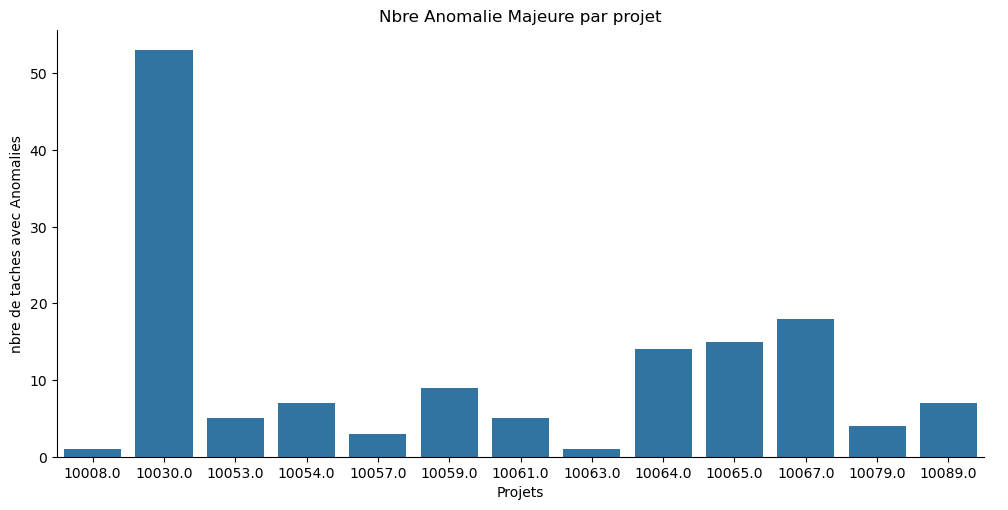

In [52]:
#Create a graph that shows the number of major anomalies per project
sns.catplot(data=Anomalie_majeure_parprojet, x = 'projectId', y= 'Anomalie_nbre_issue', kind='bar', aspect = 2)
plt.xlabel('Projets')
plt.ylabel('nbre de taches avec Anomalies')
plt.title('Nbre Anomalie Majeure par projet')

In [53]:
repartition_criticité_partype = result_df_customfields_clean.groupby("Criticité_value")['projectId'].nunique()  
repartition_criticité_partype

Criticité_value
Anomalie bloquante     9
Anomalie majeure      13
Anomalie mineure      50
Name: projectId, dtype: int64

In [54]:
repartition_criticité_partype= pd.DataFrame(repartition_criticité_partype).reset_index()
repartition_criticité_partype

,Criticité_value,projectId
0,Anomalie bloquante,9
1,Anomalie majeure,13
2,Anomalie mineure,50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Criticité_value  3 non-null      object
 1   projectId        3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes


([<matplotlib.patches.Wedge at 0x27a1620ee50>,
 [Text(1.0162674857624154, 0.4209517756015988, 'Anomalie bloquante'),
  Text(0.23808358650393224, 1.0739256053551498, 'Anomalie majeure'),
  Text(-0.63093417372393, -0.9010671830819841, 'Anomalie mineure')],
 [Text(0.5543277195067721, 0.22961005941905385, '12.5%'),
  Text(0.12986377445669028, 0.5857776029209907, '18.1%'),
  Text(-0.3441459129403254, -0.49149119077199127, '69.4%')])

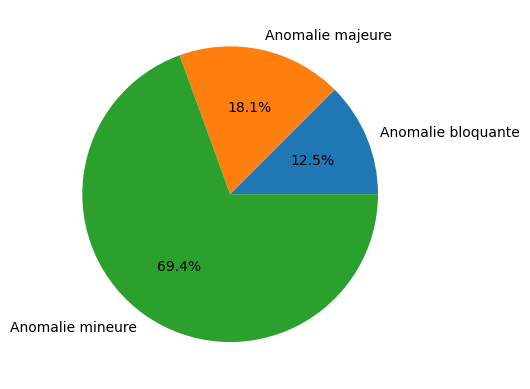

In [55]:
#Create a pie chart to show the distribution of anomaly frequency

repartition_criticité_partype.info()
y= repartition_criticité_partype['projectId']
x = repartition_criticité_partype['Criticité_value']
plt.pie(y,labels=x , autopct='%1.1f%%')

## 4. Hours Comparaison 

Estimation Types in the Company

In the company, there are three types of estimations performed:

Commercial Estimation: This is done when the commercial team discusses with the customer to set an estimate of the time the project will take.

Technical Estimation: The internal technical team provides their own estimate regarding the time required for the project.

Actual Time: This refers to the real time spent by the team on the project, as extracted from Tempo.

Our objective is to compare the commercial, technical, and actual time estimates.

In [56]:
#Examine the commercial hours estimation per project
result_df_customfields_clean['Macro_estimation_epic_heure'].value_counts()
macro_esti_commer_parprojet = result_df_customfields_clean.groupby("projectId")['Macro_estimation_epic_heure'].sum().reset_index()
macro_esti_commer_parprojet.rename(columns={'Macro_estimation_epic_heure':'nbre_heure_parprojet'},inplace=True)
macro_esti_commer_parprojet

,projectId,nbre_heure_parprojet
0,10001.0,0.0
1,10006.0,0.0
2,10007.0,4734.0
3,10008.0,544.0
4,10009.0,0.0
...,...,...
56,10082.0,0.0
57,10084.0,0.0
58,10086.0,0.0
59,10088.0,0.0


In [57]:
macro_esti_commer_parprojet['projectId'].nunique()
#There are 61 projects on the list

61

In [58]:
macro_esti_commer_parprojet['nbre_heure_parprojet'].value_counts() 
#"There are 47 null values in the task estimates; they might need to be removed. 
# Only 14 projects have a commercial estimate."

nbre_heure_parprojet
 0.0       47
 4734.0     1
 544.0      1
 1.0        1
 212.0      1
 214.0      1
 956.0      1
 37.0       1
 462.0      1
 192.0      1
-2.0        1
 1237.0     1
 2114.0     1
 550.0      1
 2.0        1
Name: count, dtype: int64

In [59]:
#I remove the zeros because they skew the average
macro_esti_commer_parprojet_sanszero= macro_esti_commer_parprojet[macro_esti_commer_parprojet['nbre_heure_parprojet'] > 0 ]
macro_esti_commer_parprojet_sanszero

,projectId,nbre_heure_parprojet
2,10007.0,4734.0
3,10008.0,544.0
6,10012.0,1.0
7,10013.0,212.0
9,10015.0,214.0
15,10022.0,956.0
18,10025.0,37.0
21,10032.0,462.0
22,10033.0,192.0
29,10045.0,1237.0


In [60]:
macro_esti_commer_parprojet_sanszero.describe()

,projectId,nbre_heure_parprojet
count,13.000000,13.000000
mean,10031.846154,865.769231
std,23.462190,1307.685051
min,10007.000000,1.000000
25%,10013.000000,192.000000
50%,10025.000000,462.000000
75%,10045.000000,956.000000
max,10080.000000,4734.000000


In [61]:
result_df_customfields_clean['timeoriginalestimate']

0        []
1        []
2        []
3        []
4        []
         ..
10319    []
10320    []
10321    []
10322    []
10323    []
Name: timeoriginalestimate, Length: 10324, dtype: object

In [62]:
result_df_customfields_clean['timeoriginalestimate'].value_counts()

timeoriginalestimate
[]           6574
[14400]       412
[10800]       378
[28800]       325
[7200]        245
             ... 
[79200]         1
[171300]        1
[259200]        1
[1004400]       1
[133200]        1
Name: count, Length: 68, dtype: int64

In [63]:
print(result_df_customfields_clean['timeoriginalestimate'].apply(type).value_counts())

timeoriginalestimate
<class 'list'>        8902
<class 'NoneType'>    1422
Name: count, dtype: int64


In [65]:
# Extract the first element from each list, or None if the list is empty.
result_df_customfields_clean['time_estimate_techni'] = result_df_customfields_clean['timeoriginalestimate'].apply(lambda x: x[0] if x else None)
result_df_customfields_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           10324 non-null  int64         
 1   key                          10324 non-null  object        
 2   fields                       10324 non-null  object        
 3   updated                      10323 non-null  datetime64[ns]
 4   changelog                    10323 non-null  object        
 5   projectId                    10323 non-null  float64       
 6   projectKey                   10324 non-null  object        
 7   transitions                  10324 non-null  object        
 8   renderedFields               10324 non-null  object        
 9   Parent_link                  8901 non-null   object        
 10  Epic_name                    81 non-null     object        
 11  Road_map_produit             262 non-null

In [66]:
result_df_customfields_clean['time_estimate_techni'].value_counts()

time_estimate_techni
14400.0      412
10800.0      378
28800.0      325
7200.0       245
0.0          159
            ... 
79200.0        1
171300.0       1
259200.0       1
1004400.0      1
133200.0       1
Name: count, Length: 67, dtype: int64

In [67]:
esti_technique_parprojet = result_df_customfields_clean.groupby("projectId")['time_estimate_techni'].sum()
esti_technique_parprojet.info()
esti_technique_parprojet= pd.DataFrame(esti_technique_parprojet).reset_index()
esti_technique_parprojet.rename(columns= {'time_estimate_techni':'nbre_sectech_parprojet'} ,inplace=True)
esti_technique_parprojet
#There are 61 projects with a potential estimate --> verify if there are any null values.

<class 'pandas.core.series.Series'>
Index: 61 entries, 10001.0 to 10089.0
Series name: time_estimate_techni
Non-Null Count  Dtype  
--------------  -----  
61 non-null     float64
dtypes: float64(1)
memory usage: 976.0 bytes


,projectId,nbre_sectech_parprojet
0,10001.0,967500.0
1,10006.0,900.0
2,10007.0,1929000.0
3,10008.0,4024800.0
4,10009.0,384360.0
...,...,...
56,10082.0,0.0
57,10084.0,7200.0
58,10086.0,0.0
59,10088.0,28800.0


In [68]:
esti_technique_parprojet['nbre_sectech_parprojet'].value_counts()
#There are 22 unestimated projects to be removed from the analysis. 
# This leaves us with 39 estimated projects (61 - 22)

nbre_sectech_parprojet
0.0           22
14400.0        3
21600.0        2
5400.0         2
967500.0       1
108900.0       1
117000.0       1
5341680.0      1
1258560.0      1
259200.0       1
25200.0        1
180000.0       1
205200.0       1
169200.0       1
302400.0       1
43200.0        1
7200.0         1
28800.0        1
7866960.0      1
391500.0       1
900.0          1
172800.0       1
7410600.0      1
21440400.0     1
758820.0       1
595800.0       1
7432200.0      1
201600.0       1
258600.0       1
11977260.0     1
263400.0       1
414000.0       1
384360.0       1
4024800.0      1
1929000.0      1
97200.0        1
Name: count, dtype: int64

In [69]:
esti_technique_parprojet
#I remove the zeros because they skew the average."
esti_technique_parprojet_sanszero= esti_technique_parprojet[esti_technique_parprojet['nbre_sectech_parprojet'] > 0 ]
esti_technique_parprojet_sanszero

,projectId,nbre_sectech_parprojet
0,10001.0,967500.0
1,10006.0,900.0
2,10007.0,1929000.0
3,10008.0,4024800.0
4,10009.0,384360.0
5,10011.0,414000.0
6,10012.0,263400.0
7,10013.0,11977260.0
9,10015.0,258600.0
14,10021.0,201600.0


In [70]:
esti_technique_parprojet.describe() #in seconds 

,projectId,nbre_sectech_parprojet
count,61.000000,6.100000e+01
mean,10044.672131,1.225106e+06
std,24.971131,3.503619e+06
min,10001.000000,0.000000e+00
25%,10022.000000,0.000000e+00
50%,10046.000000,2.160000e+04
75%,10064.000000,3.024000e+05
max,10089.000000,2.144040e+07


In [71]:
#do a left join between the table esti_technique_parprojet_sanszero(39 projects) and macro_esti_commerc_parprojet_sanszero(14 projects)
merge_esti_commerc_techni = pd.merge(macro_esti_commer_parprojet_sanszero,esti_technique_parprojet_sanszero, on = 'projectId')
merge_esti_commerc_techni.rename(columns={'nbre_heure_parprojet':'nbre_heure_Commerci_parprojet'},inplace=True) 
merge_esti_commerc_techni['tech_heure_esti']=merge_esti_commerc_techni['nbre_sectech_parprojet']/3600
merge_esti_commerc_techni
#we have to optain 12 projects for which the commercial and technical estimation is done 

,projectId,nbre_heure_Commerci_parprojet,nbre_sectech_parprojet,tech_heure_esti
0,10007.0,4734.0,1929000.0,535.833333
1,10008.0,544.0,4024800.0,1118.000000
2,10012.0,1.0,263400.0,73.166667
3,10013.0,212.0,11977260.0,3327.016667
4,10015.0,214.0,258600.0,71.833333
5,10022.0,956.0,7432200.0,2064.500000
6,10025.0,37.0,595800.0,165.500000
7,10032.0,462.0,21440400.0,5955.666667
8,10033.0,192.0,7410600.0,2058.500000
9,10045.0,1237.0,7866960.0,2185.266667


In [83]:
jira_projects = pd.read_excel('Jira_projects.xlsx')
jira_projects.head(3)

,id,key,lead,name,projectTypeKey
0,10032,MAI,"{""self"": ""https://jira-monkeyfactory.atlassian...",maintenance,software
1,10009,AR,"{""self"": ""https://jira-monkeyfactory.atlassian...",Apple,software
2,10008,BAY,"{""self"": ""https://jira-monkeyfactory.atlassian...",Bayonne,software


In [84]:
#the merge is done here in order ot have the name of the corresponding projects
merge_esti_commerc_techni_nomprojet = pd.merge(merge_esti_commerc_techni,jira_projects, left_on= 'projectId', right_on='id')
merge_esti_commerc_techni_nomprojet = merge_esti_commerc_techni_nomprojet.drop(columns=['id','lead','projectTypeKey'])
merge_esti_commerc_techni_nomprojet

,projectId,nbre_heure_Commerci_parprojet,nbre_sectech_parprojet,tech_heure_esti,key,name
0,10007.0,4734.0,1929000.0,535.833333,GU,Guinée
1,10008.0,544.0,4024800.0,1118.000000,BAY,Bayonne
2,10012.0,1.0,263400.0,73.166667,CHA,Chartres
3,10013.0,212.0,11977260.0,3327.016667,MAR,Marmande
4,10015.0,214.0,258600.0,71.833333,VIL,Villeneuve
5,10022.0,956.0,7432200.0,2064.500000,SH,Saint- Helois
6,10025.0,37.0,595800.0,165.500000,BRL,Berlin
7,10032.0,462.0,21440400.0,5955.666667,MAI,maintenance
8,10033.0,192.0,7410600.0,2058.500000,NET,Nettoyage
9,10045.0,1237.0,7866960.0,2185.266667,PAR,Paris


In [88]:
#confrunting the estimations , to the real values extracted form the table temps_projets
temps_projects = pd.read_csv('temps_projet.csv')
temps_projects.rename(columns={'Total Time Spent (Heures)':'nbre_h_réelles_parprojet'},inplace=True) 
temps_projects.head(3)

,Unnamed: 0,projectId,Total Time Spent (Seconds),nbre_h_réelles_parprojet
0,0,10028.0,68026395,18896.220833
1,1,10013.0,30619470,8505.408333
2,2,10032.0,17518515,4866.254167


In [89]:
merge_esti_commerc_techni_nomprojet.head(3)

,projectId,nbre_heure_Commerci_parprojet,nbre_sectech_parprojet,tech_heure_esti,key,name
0,10007.0,4734.0,1929000.0,535.833333,GU,Guinée
1,10008.0,544.0,4024800.0,1118.000000,BAY,Bayonne
2,10012.0,1.0,263400.0,73.166667,CHA,Chartres


In [95]:
#the merge is done here to combine estimated hours and the real hours spend on each project
merge_esti_commerc_techni_réelle_nomprojet = pd.merge(merge_esti_commerc_techni_nomprojet,temps_projects, on= 'projectId')
merge_esti_commerc_techni_réelle_nomprojet = merge_esti_commerc_techni_réelle_nomprojet.drop(columns=['Unnamed: 0','Total Time Spent (Seconds)','nbre_sectech_parprojet'])
merge_esti_commerc_techni_réelle_nomprojet#.head(3)

,projectId,nbre_heure_Commerci_parprojet,tech_heure_esti,key,name,nbre_h_réelles_parprojet
0,10007.0,4734.0,535.833333,GU,Guinée,880.666667
1,10008.0,544.0,1118.000000,BAY,Bayonne,3555.000000
2,10012.0,1.0,73.166667,CHA,Chartres,814.166667
3,10013.0,212.0,3327.016667,MAR,Marmande,8505.408333
4,10015.0,214.0,71.833333,VIL,Villeneuve,527.995833
5,10022.0,956.0,2064.500000,SH,Saint- Helois,4178.166667
6,10025.0,37.0,165.500000,BRL,Berlin,319.333333
7,10032.0,462.0,5955.666667,MAI,maintenance,4866.254167
8,10033.0,192.0,2058.500000,NET,Nettoyage,2142.083333
9,10045.0,1237.0,2185.266667,PAR,Paris,1441.000000


In [96]:
temps_projects.describe()

,Unnamed: 0,projectId,Total Time Spent (Seconds),nbre_h_réelles_parprojet
count,56.000000,56.000000,5.600000e+01,56.000000
mean,27.500000,10043.678571,3.689232e+06,1024.786607
std,16.309506,24.355777,1.024751e+07,2846.531555
min,0.000000,10001.000000,3.600000e+03,1.000000
25%,13.750000,10021.750000,5.805000e+04,16.125000
50%,27.500000,10045.500000,4.455000e+05,123.750000
75%,41.250000,10062.250000,2.284875e+06,634.687500
max,55.000000,10089.000000,6.802640e+07,18896.220833


C:\Users\celin\AppData\Local\Temp\ipykernel_10592\2164717922.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


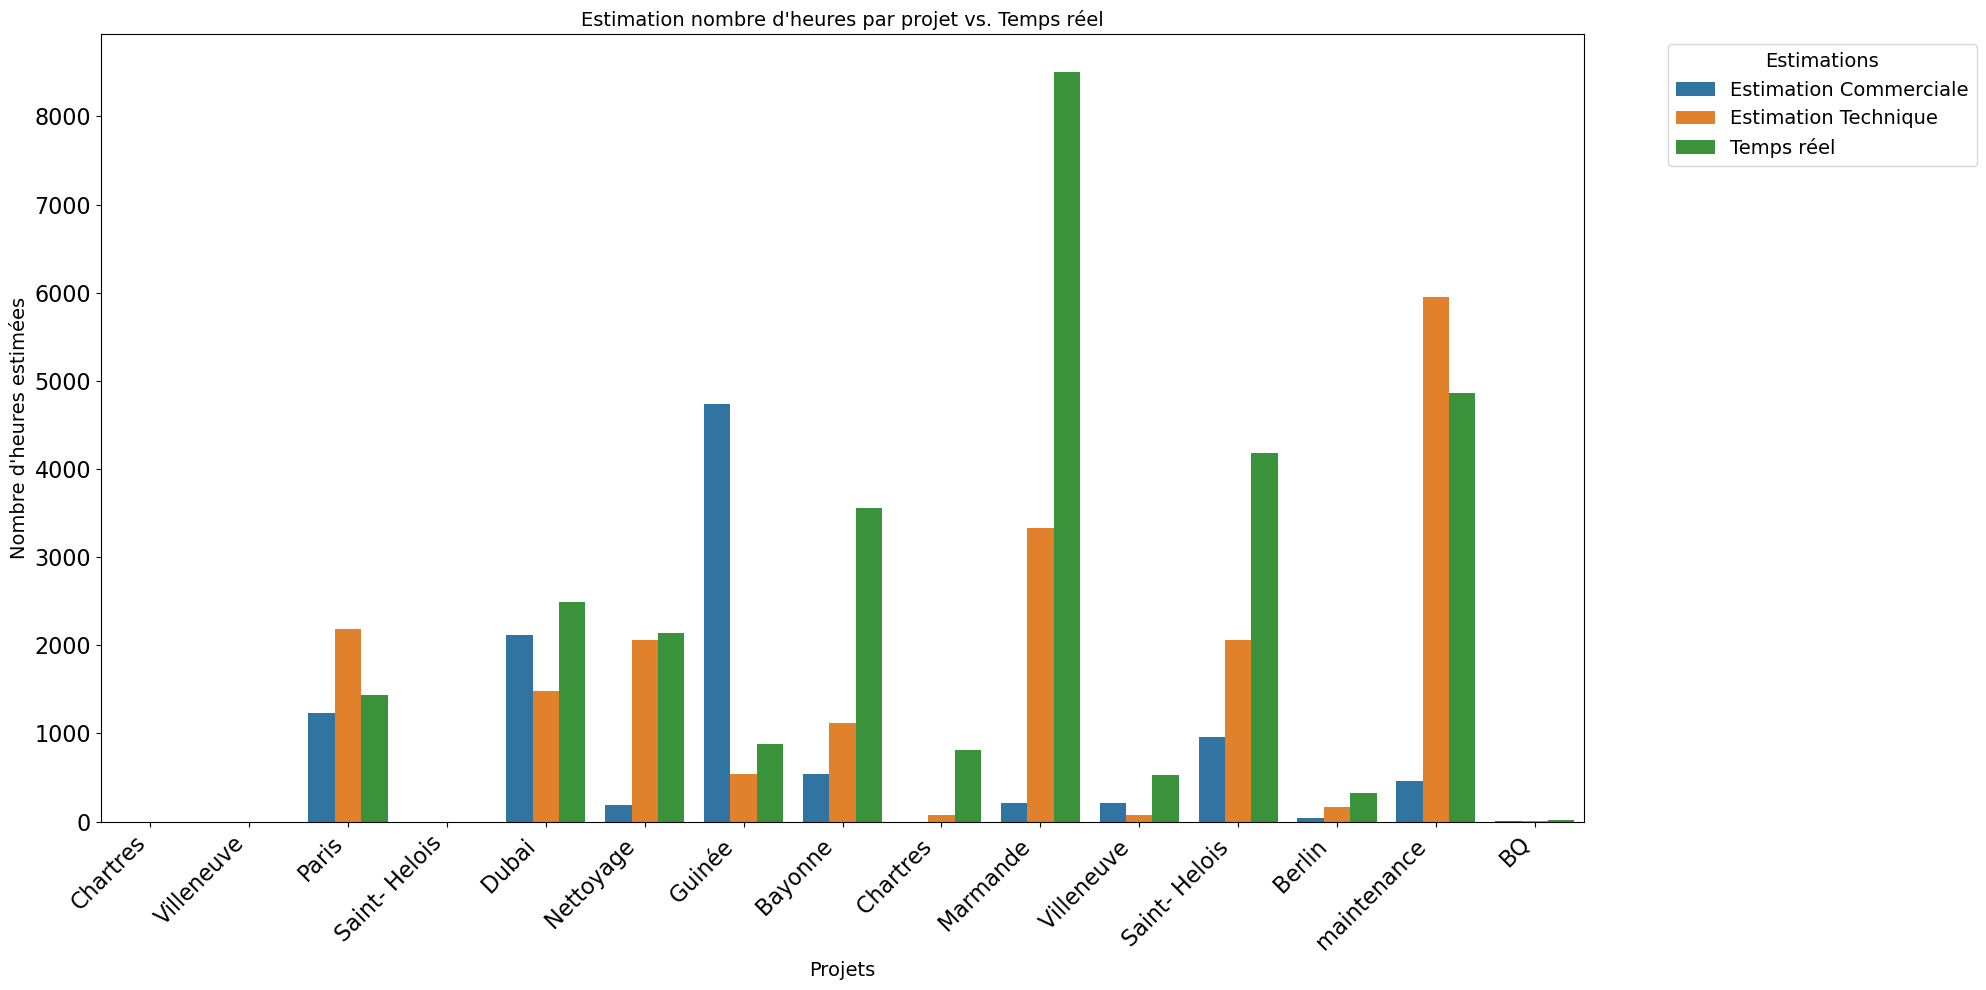

In [98]:
# Create a DataFrame to combine the two data series
df1 = merge_esti_commerc_techni_réelle_nomprojet[['name', 'nbre_heure_Commerci_parprojet']].copy()
df1['Estimations'] = 'Estimation Commerciale'

df2 = merge_esti_commerc_techni_réelle_nomprojet[['name', 'tech_heure_esti']].copy()
df2.rename(columns={'tech_heure_esti': 'nbre_heure_Commerci_parprojet'}, inplace=True)
df2['Estimations'] = 'Estimation Technique'

df3 = merge_esti_commerc_techni_réelle_nomprojet[['name', 'nbre_h_réelles_parprojet']].copy()
df3.rename(columns={'nbre_h_réelles_parprojet': 'nbre_heure_Commerci_parprojet'}, inplace=True)
df3['Estimations'] = 'Temps réel'

# Combine the DataFrames
combined_df = pd.concat([df1, df2, df3])

# Define the custom order of the projects
order = ['Chartres', 'Villeneuve', 'Paris','Saint- Helois', 'Dubai ', 'Nettoyage '] + \
        [x for x in combined_df['name'].unique() if x not in ['Chartres', 'Villeneuve', 'Paris', 'Saint- Helois', 'Dubai', 'Nettoyage ']]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the bars side by side
sns.barplot(
    data=combined_df,
    x='name',
    y='nbre_heure_Commerci_parprojet',
    hue='Estimations',
    ax=ax,
    order=order
)

# Customize the plot
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xlabel('Projets', fontsize=14)
ax.set_ylabel('Nombre d\'heures estimées', fontsize=14)
ax.tick_params(axis='both', labelsize=16)
ax.set_title('Estimation nombre d\'heures par projet vs. Temps réel', fontsize=14)

# Move the legend outside the plot
ax.legend(title='Estimations', fontsize=14, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout and save the figure
plt.tight_layout()
plt.savefig('comparaison_estimation.png', transparent=True, bbox_inches='tight')

# Display the chart
plt.show()